<a href="https://colab.research.google.com/github/vincent-arese/OC-P04VA/blob/main/P4_VA_FAOdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P4-VA Panorama de l’état de la malnutrition dans le monde (FAO 2017)

Dataset : FAO stat : 

# Environnement de travail et  Data set

In [5]:
#Prepa Env PIP
# librairie pour combiner Pyhton & SQL https://towardsdatascience.com/fugue-and-duckdb-fast-sql-code-in-python-e2e2dfc0f8eb
#!pip install -U fugue[duckdb,sql] 
!pip install pandas-bokeh

#  TO DEL    !pip install -U dash 

#! pip list -v
! pip list -v | grep [Pp]an 
! pip list -v | grep [Pp]lot
! pip list -v | grep [Ss]ea

# ! pip install --upgrade pandas

pandas                        1.3.5                 /usr/local/lib/python3.7/dist-packages pip
pandas-bokeh                  0.5.5                 /usr/local/lib/python3.7/dist-packages pip
pandas-datareader             0.9.0                 /usr/local/lib/python3.7/dist-packages pip
pandas-gbq                    0.13.3                /usr/local/lib/python3.7/dist-packages pip
pandas-profiling              1.4.1                 /usr/local/lib/python3.7/dist-packages pip
pandocfilters                 1.5.0                 /usr/local/lib/python3.7/dist-packages pip
panel                         0.12.1                /usr/local/lib/python3.7/dist-packages pip
sklearn-pandas                1.8.0                 /usr/local/lib/python3.7/dist-packages pip
matplotlib                    3.2.2                 /usr/local/lib/python3.7/dist-packages pip
matplotlib-inline             0.1.3                 /usr/local/lib/python3.7/dist-packages pip
matplotlib-venn               0.11.6              

In [7]:
#Charger les librairies Pythons 
import numpy as np
import pandas as pd
from pandas.core.groupby.generic import DataFrameGroupBy
pd.set_option('display.max_columns', None)  #pd.set_option('max_columns', 10) limiter le nbr de colonnes visualisé à 10 /none (=> scrollbar)
pd.set_option('display.max_rows', 40)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas_bokeh
#import fugue_duckdb
#from fugue_notebook import setup ;setup()

### Fonction Personalisées

In [8]:
#Fonction : Décrire un Data Frame
def DECRIRE(DataFrame):
  """"Description personalisé d'un DataFrame 
  DECRIRE(DataFrame)  : Nom du dataframe
  frait un print  :  DataFrame.info()  - DataFrame.Describeo()  - Sommpe des Nulls - Data.colomuns 
  """
  data=DataFrame
  return print(data.info(),'\n \n Describe :\n', data.describe(), '\n\n Nb de NaN:',data.isnull().sum(axis=0),'\n\n liste_des_Colonnes :', data.columns)  # Compter les nan   

In [9]:
# Fonction Recherche Valeur dans un DataFrame
def RECHERCHEV(DataFrame,Valeur):
 dfx=DataFrame.mask(Valeur)
 return dfx

In [10]:
# #Recherche valeur (val) dans un data frame
# val=0 ;df=dispo
# print(df[df['Habitant_millions'] == val].sum())
# print(df[df["Exports"] == val].count()) ; #df[df["Exports"] == val]

## Data Set FAO

In [11]:
#  Importer les données en Pandas dataframe
#aideDataPATH='/content/drive/MyDrive/DataSc/P4VA/'
DataPATH='https://raw.githubusercontent.com/vincent-arese/OC-P04VA/main/FAOdata/'

#DEBUG print(DataPATH+'SecuAlimUTF8.csv',': Pd.read OK')

SecuAlimRAW=pd.read_csv(DataPATH+'SecuAlimUTF8.csv',sep=';')
BilanAlimRAW=pd.read_csv(DataPATH+'BilansAlimentaires-UTF8.zip',sep=',')

AideAlim


PAYS=pd.read_excel('https://github.com/vincent-arese/OC-P04VA/blob/main/FAOdata/PAYS%20_FAO.xlsx?raw=true', sheet_name='PaysFAO')   # DataSet pour plot map monde 

print("https://github.com/vincent-arese/OC-P04VA/tree/main/FAOdata")

https://github.com/vincent-arese/OC-P04VA/tree/main/FAOdata


In [12]:
GproduitRAW=pd.read_csv(DataPATH+'FAOSTAT_listeGroupeProduits.csv',sep=',',usecols = [i for i in range(5)],encoding = 'utf-8')
# GproduitRAW
Produits=pd.read_csv(DataPATH+'FAOSTAT_ListeProduits.csv',sep=',',usecols = [i for i in range(3)])
# Produits

ListeProduits=pd.merge(GproduitRAW,Produits, how='left',on='Code Produit')
ListeProduits

,Code Groupe de produits,Groupe de produits,Code Produit,Produit_x,Coefficient,Produit_y,Description
0,SC,Cultures Primaires,1714,Cultures Primaires,1.0,NaN,NaN
1,SC,Cultures Primaires,1743,?pices,1.0,NaN,NaN
2,SC,Cultures Primaires,1793,Grand Total Exc Alcool,1.0,NaN,NaN
3,SC,Cultures Primaires,1740,Stimulants,1.0,NaN,NaN
4,SC,Cultures Primaires,1741,Stimulants Primaires,1.0,NaN,NaN
...,...,...,...,...,...,...,...
2775,1765,"Viande, total",1073,"Viande, oie",1.0,"Viande, oie","Fraîche, réfrigérée ou congelée."
2776,1765,"Viande, total",977,"Viande, ovin",1.0,"Viande, ovin","Viande de mouton et d'agneau, fraîche, réfrigé..."
2777,1765,"Viande, total",1089,"Viande, pigeons et autres volatiles nda",1.0,"Viande, pigeons et autres volatiles nda","Fraîche, réfrigérée ou congelée."
2778,1765,"Viande, total",1035,"Viande, suid?s",1.0,"Viande, suidés",Viande non désossée de suidés domestiques ou s...


In [13]:
# ListeProduits.info()
ListeProduits.isnull().sum(axis=0)

Code Groupe de produits      0
Groupe de produits           0
Code Produit                 0
Produit_x                    0
Coefficient                  0
Produit_y                    7
Description                119
dtype: int64

In [14]:
ListeProduits[ListeProduits['Produit_y'].isnull()] 

,Code Groupe de produits,Groupe de produits,Code Produit,Produit_x,Coefficient,Produit_y,Description
0,SC,Cultures Primaires,1714,Cultures Primaires,1.0,NaN,NaN
1,SC,Cultures Primaires,1743,?pices,1.0,NaN,NaN
2,SC,Cultures Primaires,1793,Grand Total Exc Alcool,1.0,NaN,NaN
3,SC,Cultures Primaires,1740,Stimulants,1.0,NaN,NaN
4,SC,Cultures Primaires,1741,Stimulants Primaires,1.0,NaN,NaN
5,SL,?levage primaire,1777,Peaux primaires,1.0,NaN,NaN
6,SL,?levage primaire,1786,Produits Animaux,1.0,NaN,NaN


In [15]:
ListeProduits['Groupe de produits'].unique() 

array(['Cultures Primaires', '?levage primaire',
       'Abats Comestibles Primai', 'Agriculture', 'Agrumes, total',
       'Boeuf Mouton Porc Prim', 'C?r?ales', 'C?r?ales Secondaires, tot',
       'C?r?ales, total', 'Cultur Sucrier Brutes',
       'Cultur Textiles Primaire', 'Cultures D?riv?s',
       'Cultures Ole?gineuses, ?quivalent huile', '?levage transform?',
       '?pices', 'Fruits ? Coque, total', 'Fruits et Melons',
       'Fruits Prim et Melons', 'Fruits,excl Melons, total',
       'Graisses Abattage Prim', 'Grand Total Exc Alcool',
       'Huiles et Graisses', 'Huiles et Graisses Anim',
       'Lait Prod Lait Exc Beurr', 'Lait, total',
       'L?g S?ch+Fr A Coqu+Ol?ag', 'L?gumes', 'L?gumes et Melons, total',
       'L?gumes Prim Exc Melons', 'L?gumineuses S?ches',
       'L?gumineuses S?ches, tot.', 'Millet et Sorgho', 'Oeufs',
       'Oeufs Naturels', 'Produits Animaux', 'Racines et Tubercules',
       'Racines&Tubercules, total', 'Stimulants', 'Stimulants Primaires',
   

In [16]:
ListeProduits[(ListeProduits['Code Produit']==1743)] 

,Code Groupe de produits,Groupe de produits,Code Produit,Produit_x,Coefficient,Produit_y,Description
1,SC,Cultures Primaires,1743,?pices,1.0,NaN,NaN


In [17]:
# encoding='ANSI'

# pd.read_csv(DataPATH+'BilansAlimentaires_F_Toutes_les_Données_(Normalisé).zip',sep=',',encoding='utf-8')

#Doc python Encoding :  https://docs.python.org/3/library/codecs.html#standard-encodings

### Sécurité Alimentaire




#### Nettoyage & Formatage Dataframe

In [18]:
#INFO SecuAlimRAW.info() ; SecuAlimRAW.columns 

In [19]:
# Formatage SecuAlimRAW
SecuAlimRAW=SecuAlimRAW.rename(columns={'Code zone' : 'CodeZone', 'Code Produit': 'CodeProduit', 'Code Élément':'CodeElement',
       'Élément':'Element', 'Code année':'AnnéeREF'})
#SecuAlimRAW['AnnéeREF']=SecuAlimRAW['CodeAnnée']
SecuAlimRAW.drop(columns=['Note','Element'],inplace=True)
#DEBUG SecuAlimRAW


# Converions Période (Année) en AnnéeREF ( TEST pour isoler les Periodes  &  moyenne des deux bornes pour déterminer l'AnnéeREF)
SecuAlimRAW.loc[SecuAlimRAW.AnnéeREF >=3000,'AnnéeREF']=((SecuAlimRAW.loc[SecuAlimRAW.AnnéeREF >=3000,'AnnéeREF'].astype(str).str[:4].astype(int)+SecuAlimRAW.loc[SecuAlimRAW.AnnéeREF >=3000,'AnnéeREF'].astype(str).str[4:8].astype(int))/2).astype(int)

## DEBUG    Requettes  partielles 
#            SecuAlimRAW.AnnéeREF.unique()  
#                   SecuAlimRAW.loc[SecuAlimRAW.AnnéeREF >=3000,'AnnéeREF'].unique()
#                   SecuAlimRAW.loc[SecuAlimRAW.AnnéeREF >=3000,'AnnéeREF'].astype(str).str[:4].astype(int)
#SecuAlimRAW.AnnéeREF.unique() #test pour valider Code 

SecuAlimRAW.head(5)

,CodeZone,Zone,CodeProduit,Produit,CodeElement,AnnéeREF,Année,Unité,Valeur,Symbole
0,2,Afghanistan,21010,Suffisance des apports énergétiques alimentair...,6121,2001,2000-2002,%,87,F
1,2,Afghanistan,21010,Suffisance des apports énergétiques alimentair...,6121,2002,2001-2003,%,88,F
2,2,Afghanistan,21010,Suffisance des apports énergétiques alimentair...,6121,2003,2002-2004,%,91,F
3,2,Afghanistan,21010,Suffisance des apports énergétiques alimentair...,6121,2004,2003-2005,%,92,F
4,2,Afghanistan,21010,Suffisance des apports énergétiques alimentair...,6121,2005,2004-2006,%,92,F


In [20]:
# DEBUG SecuAlimRAW.info();SecuAlimRAW.columns

In [21]:
# DEBUG print(SecuAlimRAW.Zone.unique(),'\nTotal:',len(SecuAlimRAW.Zone.unique()))

In [22]:
#Nettoyage SecuAlimRAW
# Drop  les CodeZone correspondant à des agrégats ( continent, groupe de pays ........... ) =>  CodeZone>=400 ! 
''' 'Pays les moins développés' 'Pays sans littoral en voie de développement' 'Petites îles en voie de Développement'  'Pays à faible revenu et à déficit vivrier' 'Pays à faible revenu'  'Pays à revenu moyen' 'High-income economies'  'Upper-middle-income economies' '''

#   print(SecuAlimRAW.Zone.unique(),'\nTotal:',len(SecuAlimRAW.Zone.unique()
df=SecuAlimRAW
df.drop(df.loc[df['CodeZone'] >= 400].index, inplace=True)
#DEBUG print(df.Zone.unique(),'\nTotal:',len(df.Zone.unique())) #   Verfier Si le filtre a bien fonctionné
# Creation Colonne listeProdiut pour faciliter le filtrage 
#MEMO Index(['CodeZone', 'Zone', 'CodeProduit', 'Produit', 'CodeElement', 'Année', 'Unité', 'Valeur', 'Symbole', 'AnnéeREF'],      dtype='object')

df['ListeProduit']=df.CodeProduit.astype(str)+'-'+df.Produit
df.ListeProduit.unique()
#DEBUG df

array(['21010-Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)',
       '21011-Valeur moyenne de la production alimentaire ($I constants par personne) (moyenne sur 3 ans)',
       "22000-Disponibilité alimentaire par habitant utilisée dans l'estimation de la prévalence de la sous-alimentation (kcal/personne/jour) (moyenne sur 3 ans)",
       '21012-Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)',
       '21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       '21014-Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)',
       '22013-PIB par habitant, ($ PPA internationaux constants de 2011)',
       '210041-Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)',
       '210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
       '210401-Prévalence de l’insécurité alimentaire grave – populati

In [23]:
#Masque pour choisir les Codeproduits à afficher
#df_mask=(df.CodeProduit==21010)

df_mask=(df.CodeProduit==21013)|(df.CodeProduit==21014)|(df.CodeProduit==210011)|(df.CodeProduit==21056)|(df.CodeProduit==21057)|(df.CodeProduit==21061)
# df_mask=(df.CodeProduit==21013)|(df.CodeProduit==21014)|(df.CodeProduit==210011)|(df.CodeProduit==210071)|(df.CodeProduit==210081)|(df.CodeProduit==21056)|(df.CodeProduit==21057)|(df.CodeProduit==21061) #Ancienne liste

filtered_df = df[df_mask]

filtered_df.query('AnnéeREF==2010').head(20)
#DEBUG print(filtered_df.CodeProduit.unique(),'\n',filtered_df.ListeProduit.unique())  # Vérif CodeProduit sélectionnées ! 



,CodeZone,Zone,CodeProduit,Produit,CodeElement,AnnéeREF,Année,Unité,Valeur,Symbole,ListeProduit
81,2,Afghanistan,21013,Disponibilités protéiques moyennes (g/personne...,6123,2010,2009-2011,g/personne/jour,57.7,F,21013-Disponibilités protéiques moyennes (g/pe...
98,2,Afghanistan,21014,Disponibilités protéines moyennes d’origine an...,6123,2010,2009-2011,g/personne/jour,11.7,F,21014-Disponibilités protéines moyennes d’orig...
153,2,Afghanistan,210011,Nombre de personnes sous-alimentées (millions)...,6132,2010,2009-2011,millions,6.9,F,210011-Nombre de personnes sous-alimentées (mi...
530,2,Afghanistan,21056,Besoins énergétiques alimentaires minimaux (kc...,6128,2010,2010,Kcal/personne/jour,1632,F,21056-Besoins énergétiques alimentaires minima...
551,2,Afghanistan,21057,Besoins énergétiques alimentaires moyens (kcal...,6128,2010,2010,Kcal/personne/jour,2066,F,21057-Besoins énergétiques alimentaires moyens...
613,2,Afghanistan,21061,Disponibilités moyennes de matière grasse (g/p...,6123,2010,2009-2011,g/personne/jour,32,F,21061-Disponibilités moyennes de matière grass...
702,202,Afrique du Sud,21013,Disponibilités protéiques moyennes (g/personne...,6123,2010,2009-2011,g/personne/jour,81.7,F,21013-Disponibilités protéiques moyennes (g/pe...
719,202,Afrique du Sud,21014,Disponibilités protéines moyennes d’origine an...,6123,2010,2009-2011,g/personne/jour,33,F,21014-Disponibilités protéines moyennes d’orig...
787,202,Afrique du Sud,210011,Nombre de personnes sous-alimentées (millions)...,6132,2010,2009-2011,millions,1.8,F,210011-Nombre de personnes sous-alimentées (mi...
1177,202,Afrique du Sud,21056,Besoins énergétiques alimentaires minimaux (kc...,6128,2010,2010,Kcal/personne/jour,1856,F,21056-Besoins énergétiques alimentaires minima...


In [24]:
# Recheches des Années dispo  pour chaque CodeProduit (Non dispo = futur NaN)

listeCodeProduit=filtered_df.CodeProduit.unique()
for p in listeCodeProduit:
  print(p,' : ',filtered_df[(filtered_df.CodeProduit == p) & (filtered_df.AnnéeREF >= 2000)].AnnéeREF.unique(),'\n' )


# DEBUG Requettes Intermediaires pour faire la boucle For
# filtered_df[(filtered_df.CodeProduit == 210081) & (filtered_df.AnnéeREF >= 2000)].head(20)
# filtered_df[(filtered_df.CodeProduit == 210081) & (filtered_df.AnnéeREF >= 2000)].AnnéeREF.unique()



21013  :  [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017] 

21014  :  [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017] 

210011  :  [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019] 

21056  :  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020] 

21057  :  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020] 

21061  :  [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017] 



In [25]:
df=filtered_df
#Note df.columns  # Index(['CodeZone', 'Zone', 'CodeProduit', 'Produit', 'CodeElement', 'AnnéeREF', 'Année', 'Unité', 'Valeur', 'Symbole', 'ListeProduit'],     dtype='object')

# Creation du Pivot table  pour basculier les lignes en collones  et DF multi-index pour visualiser 
tableP=df.pivot( index=['CodeZone','Zone','AnnéeREF'],columns=['ListeProduit'], values='Valeur')    # tableP=df.pivot( index=['CodeZone','Zone','AnnéeREF', 'Année'],columns=['ListeProduit'], values='Valeur')
tableP

#tableZ=df.pivot( index=['CodeZone','Zone','Année','AnnéeREF'],columns=['ListeProduit'], values='Valeur')


ListeProduit              210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)  \
CodeZone Zone    AnnéeREF                                                                             
1        Arménie 2000                                                    NaN                          
                 2001                                                    0.8                          
                 2002                                                    0.7                          
                 2003                                                    0.6                          
                 2004                                                    0.5                          
...                                                                      ...                          
351      Chine   2016                                                    NaN                          
                 2017                                                    NaN                          
                 2018                                                    NaN                          
                 2019                                                    NaN                          
                 2020                                                    NaN                          

ListeProduit              21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)  \
CodeZone Zone    AnnéeREF                                                                                  
1        Arménie 2000                                                    NaN                               
                 2001                                                   65.3                               
                 2002                                                     67                               
                 2003                                                   70.3                               
                 2004                                                     74                               
...                                                                      ...                               
351      Chine   2016                                                  100.2                               
                 2017                                                  100.6                               
                 2018                                                    NaN                               
                 2019                                                    NaN                               
                 2020                                                    NaN                               

ListeProduit              21014-Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)  \
CodeZone Zone    AnnéeREF                                                                                                   
1        Arménie 2000                                                    NaN                                                
                 2001                                                   20.7                                                
                 2002                                                   22.7                                                
                 2003                                                   24.7                                                
                 2004                                                     27                                                
...                                                                      ...                                                
351      Chine   2016                                                     40                                                
                 2017                                                   40.3                                                
     

In [26]:
PAYS.info()
PAYS.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CodeContinent       187 non-null    int64 
 1   continent           187 non-null    object
 2   Code_ZoneContinent  187 non-null    int64 
 3   ZoneContinent       187 non-null    object
 4   Code_Pays           187 non-null    int64 
 5   Pays                187 non-null    object
 6   AlphaISO3           181 non-null    object
dtypes: int64(3), object(4)
memory usage: 10.4+ KB


Index(['CodeContinent', 'continent', 'Code_ZoneContinent', 'ZoneContinent',
       'Code_Pays', 'Pays', 'AlphaISO3'],
      dtype='object')

In [27]:
# Convertion df multi-index  vers  df index simple
tableZ=tableP

tableZ.columns=tableZ.columns.to_flat_index() # colonnes => concatener le multi index en un index simple https://datascientyst.com/flatten-multiindex-in-pandas/
#tableZ.columns = tableZ.columns.get_level_values(0) + '_' +  tableZ.columns.get_level_values(1).astype(str)+ '_' + tableZ.columns.get_level_values(2)

tableZ=tableZ.reset_index() # lignes Conversion de multi-index en colonnes.

#Iterration de toutes  colonnes  du dataFrame pour remplacer une valeur 
for (colname,colval) in tableZ.iteritems():
    # print(colname, colval.values)
    tableZ.loc[tableZ[colname] =='<0.1', colname] = 0.000001 

tableZ.CodeZone=tableZ.CodeZone.astype(int)
tableZ.AnnéeREF=tableZ.AnnéeREF.astype(int)
#tableZ[['21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)','21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)']].astype(float)
pd.to_numeric(tableZ['21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)'])
# tableZ

# Jointure pour data visualisation sur map 
# GeoTable=tableZ.merge(PAYS, left_on='CodeZone',right_on='Code_Pays')
# GeoTable.drop(['CodeContinent','Code_ZoneContinent','Code_Pays','Pays'], axis=1)

tableZ=tableZ.merge(PAYS, left_on='CodeZone',right_on='Code_Pays').drop(['CodeContinent','Code_ZoneContinent','Code_Pays','Pays'], axis=1) #.fillna(0)



tableZ.CodeZone=tableZ.CodeZone.astype(int)
tableZ.AnnéeREF=tableZ.AnnéeREF.astype(int)
tableZ[['210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
       '21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       '21014-Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)',
       '21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)',
       '21057-Besoins énergétiques alimentaires moyens (kcal/personne/jour)',
       '21061-Disponibilités moyennes de matière grasse (g/personne/jour) (moyenne sur 3 ans)']]=tableZ[['210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
       '21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       '21014-Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)',
       '21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)',
       '21057-Besoins énergétiques alimentaires moyens (kcal/personne/jour)',
       '21061-Disponibilités moyennes de matière grasse (g/personne/jour) (moyenne sur 3 ans)']].astype(float)
# tableZ['210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)']=tableZ['210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)'].astype(float)
tableZ=tableZ.fillna (0)

tableZ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3780 entries, 0 to 3779
Data columns (total 12 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   CodeZone                                                                                         3780 non-null   int64  
 1   Zone                                                                                             3780 non-null   object 
 2   AnnéeREF                                                                                         3780 non-null   int64  
 3   210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)                        3780 non-null   float64
 4   21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)                   3780 non-null   float64
 5   21014-

#### test des NaN

In [28]:
tableZ[tableZ.isnull().any(axis=1)]

,CodeZone,Zone,AnnéeREF,210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),21014-Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour),21057-Besoins énergétiques alimentaires moyens (kcal/personne/jour),21061-Disponibilités moyennes de matière grasse (g/personne/jour) (moyenne sur 3 ans),continent,ZoneContinent,AlphaISO3


In [29]:
tableZ.isna().any() #tableZ.isnull().any()

CodeZone                                                                                           False
Zone                                                                                               False
AnnéeREF                                                                                           False
210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)                          False
21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)                     False
21014-Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)    False
21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)                              False
21057-Besoins énergétiques alimentaires moyens (kcal/personne/jour)                                False
21061-Disponibilités moyennes de matière grasse (g/personne/jour) (moyenne sur 3 ans)              False
continent                                              

In [30]:
tableZ.isnull().any(axis=1) # equivalent : tableZ.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
3775    False
3776    False
3777    False
3778    False
3779    False
Length: 3780, dtype: bool

In [31]:
tableZ.isnull().sum(axis=0)

CodeZone                                                                                           0
Zone                                                                                               0
AnnéeREF                                                                                           0
210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)                          0
21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)                     0
21014-Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)    0
21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)                              0
21057-Besoins énergétiques alimentaires moyens (kcal/personne/jour)                                0
21061-Disponibilités moyennes de matière grasse (g/personne/jour) (moyenne sur 3 ans)              0
continent                                                                                  

In [32]:
tableZ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3780 entries, 0 to 3779
Data columns (total 12 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   CodeZone                                                                                         3780 non-null   int64  
 1   Zone                                                                                             3780 non-null   object 
 2   AnnéeREF                                                                                         3780 non-null   int64  
 3   210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)                        3780 non-null   float64
 4   21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)                   3780 non-null   float64
 5   21014-

In [33]:
#Iteration data frame  (toutes les valeurs &  Sans Doublons)
for (colname,colval) in tableZ.iteritems():
    # print(colname, colval.values)
    print(colname, colval.unique())

CodeZone [  1   2   3   4   7   8   9  10  11  12  14  16  19  20  21  23  25  27
  28  29  32  33  35  37  38  39  40  41  44  45  46  48  49  50  52  53
  54  55  56  57  58  59  60  63  66  67  68  70  72  73  74  75  79  80
  81  83  84  86  89  90  91  93  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 112 113 114 115 116 117 118 119 120 121 122 123
 124 126 128 129 130 131 132 133 134 136 137 138 141 143 144 146 147 149
 150 153 154 155 156 157 158 159 162 165 166 167 168 169 170 171 173 174
 175 176 181 183 184 185 188 189 191 193 194 195 196 197 198 199 202 203
 207 208 209 210 211 212 213 214 215 216 217 220 221 222 223 225 226 229
 230 231 233 234 235 236 237 238 244 249 250 251 255 256 272 273 276 351]
Zone ['Arménie' 'Afghanistan' 'Albanie' 'Algérie' 'Angola' 'Antigua-et-Barbuda'
 'Argentine' 'Australie' 'Autriche' 'Bahamas' 'Barbade' 'Bangladesh'
 'Bolivie (État plurinational de)' 'Botswana' 'Brésil' 'Belize'
 'Îles Salomon' 'Bulgarie' 'Myanmar' 'Burundi' 

#Graphes

### Test Graph1

In [34]:
#INFO tableZ.columns
""" Index(['CodeZone', 'Zone', 'AnnéeREF',
       '210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
       '21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       '21014-Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)',
       '21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)',
       '21057-Besoins énergétiques alimentaires moyens (kcal/personne/jour)',
       '21061-Disponibilités moyennes de matière grasse (g/personne/jour) (moyenne sur 3 ans)'],
      dtype='object', name='ListeProduit')
"""

import plotly.express as px
fig = px.line(tableZ, x='AnnéeREF', y='210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)', color='Zone', markers=True)
fig.show()

### Seaborn Violin demo 

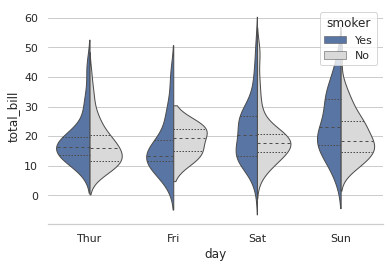

In [35]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

In [36]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [37]:
tableZ.describe()
# tableZ.describe(include='all')

,CodeZone,AnnéeREF,210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans),21014-Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour),21057-Besoins énergétiques alimentaires moyens (kcal/personne/jour),21061-Disponibilités moyennes de matière grasse (g/personne/jour) (moyenne sur 3 ans)
count,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000
mean,128.650000,2010.000000,3.396773,60.819392,27.206640,1819.226984,2347.284656,64.784577
std,74.750512,6.056102,16.603750,37.482422,23.111849,93.954665,141.071432,46.696533
min,1.000000,2000.000000,0.000000,0.000000,0.000000,1602.000000,2019.000000,0.000000
25%,66.750000,2005.000000,0.000000,45.550000,7.000000,1739.000000,2225.000000,31.300000
50%,123.500000,2010.000000,0.000001,68.300000,24.000000,1826.000000,2358.000000,63.300000
75%,191.500000,2015.000000,1.500000,87.925000,45.525000,1906.000000,2477.000000,95.000000
max,351.000000,2020.000000,249.600000,143.300000,103.000000,2077.000000,2718.000000,170.300000


### Bilan Alimentaire

#### Formatage et Netttoyage des données

In [38]:
BilanAlimRAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566345 entries, 0 to 566344
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Code zone     566345 non-null  object 
 1   Zone          0 non-null       float64
 2   Code Produit  0 non-null       float64
 3   Produit       0 non-null       float64
 4   Code Élément  0 non-null       float64
 5   Élément       0 non-null       float64
 6   Code année    0 non-null       float64
 7   Année         0 non-null       float64
 8   Unité         0 non-null       float64
 9   Valeur        0 non-null       float64
 10  Symbole       0 non-null       float64
dtypes: float64(10), object(1)
memory usage: 47.5+ MB


In [39]:
BilanAlimRAW

,Code zone,Zone,Code Produit,Produit,Code Élément,Élément,Code année,Année,Unité,Valeur,Symbole
0,"2,""Afghanistan"",""2501"",""Population"",""511"",""Pop...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2,""Afghanistan"",""2501"",""Population"",""511"",""Pop...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"2,""Afghanistan"",""2501"",""Population"",""511"",""Pop...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"2,""Afghanistan"",""2501"",""Population"",""511"",""Pop...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2,""Afghanistan"",""2501"",""Population"",""511"",""Pop...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
566340,"48,""Costa Rica"",""2619"",""Dattes"",""684"",""Disponi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566341,"48,""Costa Rica"",""2619"",""Dattes"",""684"",""Disponi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566342,"48,""Costa Rica"",""2620"",""Raisin"",""5511"",""Produc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566343,"48,""Costa Rica"",""2620"",""Raisin"",""5511"",""Produc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plotly Demo 

### Plotly demo map with animation

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



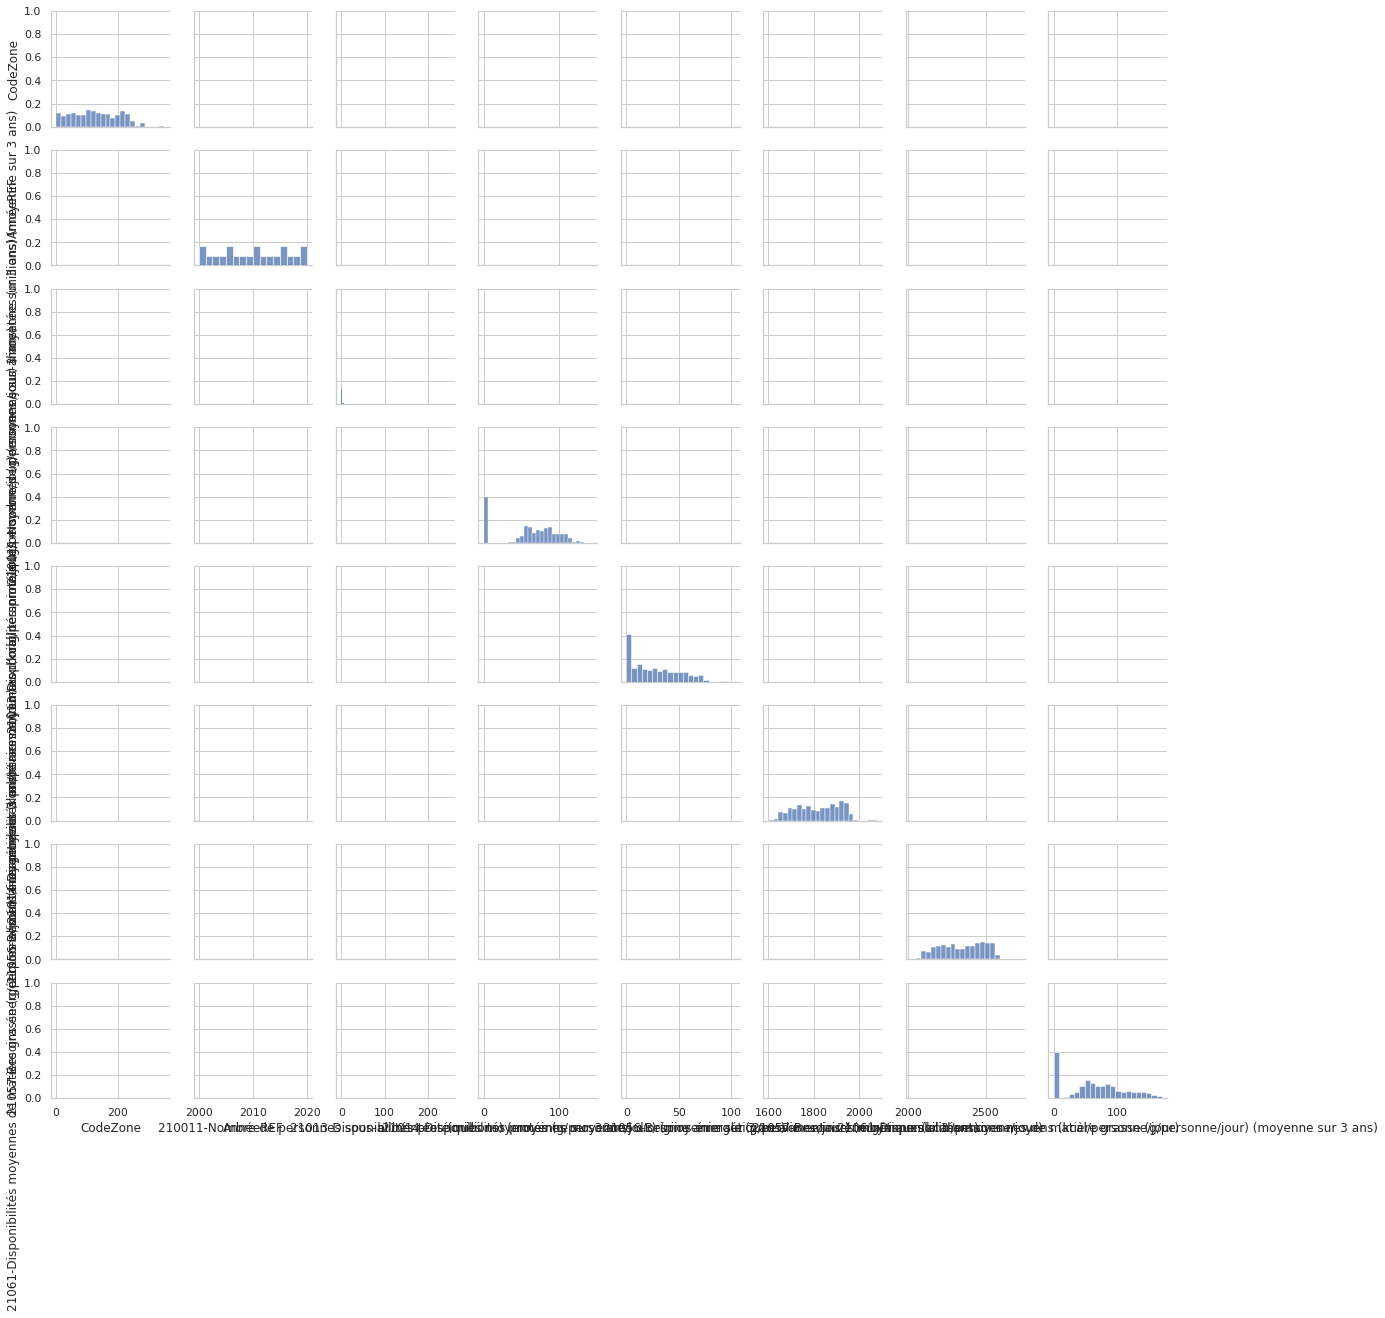

In [40]:
g = sns.PairGrid(tableZ)
g.map_diag(sns.histplot)

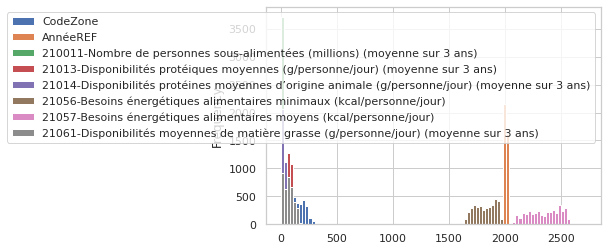

In [41]:
tableZ.plot.hist(bins=100)

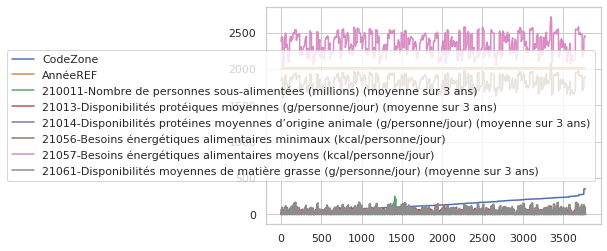

In [42]:
tableZ.plot()

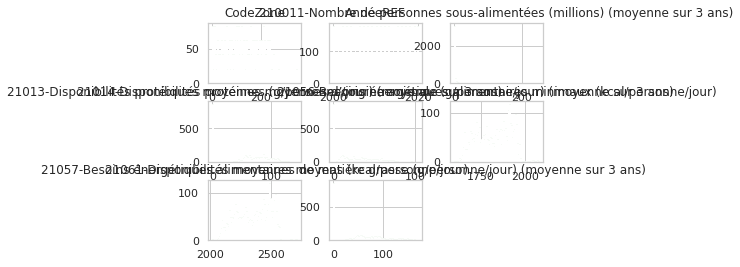

In [43]:
tableZ.hist(bins=100,color="green") ; plt.show()

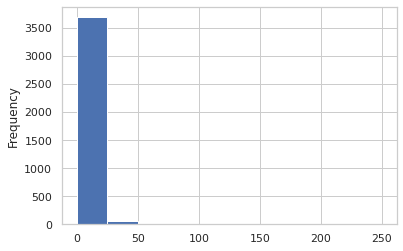

In [44]:
tableZ['210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)'].plot.hist()


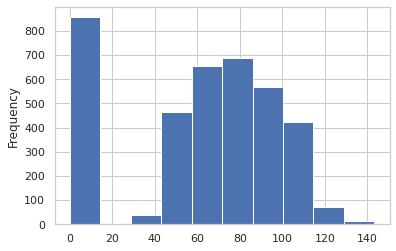

In [45]:
tableZ['21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)'].plot.hist()

In [46]:
tableZ.columns

Index(['CodeZone', 'Zone', 'AnnéeREF',
       '210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
       '21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       '21014-Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)',
       '21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)',
       '21057-Besoins énergétiques alimentaires moyens (kcal/personne/jour)',
       '21061-Disponibilités moyennes de matière grasse (g/personne/jour) (moyenne sur 3 ans)',
       'continent', 'ZoneContinent', 'AlphaISO3'],
      dtype='object')

In [47]:
#Iteration data frame  (toutes les valeurs &  Sans Doublons)
for (colname,colval) in tableZ.iteritems():
    # print(colname, colval.values)
    print(colname, colval.unique())


CodeZone [  1   2   3   4   7   8   9  10  11  12  14  16  19  20  21  23  25  27
  28  29  32  33  35  37  38  39  40  41  44  45  46  48  49  50  52  53
  54  55  56  57  58  59  60  63  66  67  68  70  72  73  74  75  79  80
  81  83  84  86  89  90  91  93  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 112 113 114 115 116 117 118 119 120 121 122 123
 124 126 128 129 130 131 132 133 134 136 137 138 141 143 144 146 147 149
 150 153 154 155 156 157 158 159 162 165 166 167 168 169 170 171 173 174
 175 176 181 183 184 185 188 189 191 193 194 195 196 197 198 199 202 203
 207 208 209 210 211 212 213 214 215 216 217 220 221 222 223 225 226 229
 230 231 233 234 235 236 237 238 244 249 250 251 255 256 272 273 276 351]
Zone ['Arménie' 'Afghanistan' 'Albanie' 'Algérie' 'Angola' 'Antigua-et-Barbuda'
 'Argentine' 'Australie' 'Autriche' 'Bahamas' 'Barbade' 'Bangladesh'
 'Bolivie (État plurinational de)' 'Botswana' 'Brésil' 'Belize'
 'Îles Salomon' 'Bulgarie' 'Myanmar' 'Burundi' 

In [48]:
tableZ.columns

Index(['CodeZone', 'Zone', 'AnnéeREF',
       '210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
       '21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       '21014-Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)',
       '21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)',
       '21057-Besoins énergétiques alimentaires moyens (kcal/personne/jour)',
       '21061-Disponibilités moyennes de matière grasse (g/personne/jour) (moyenne sur 3 ans)',
       'continent', 'ZoneContinent', 'AlphaISO3'],
      dtype='object')

In [49]:
import plotly.express as px

fig = px.scatter_geo(tableZ, locations="AlphaISO3", color="ZoneContinent",
                     hover_name="Zone", size="21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)",
                     animation_frame="AnnéeREF",
                     projection="natural earth")
fig.show()

In [50]:
import plotly.express as px

fig = px.scatter_geo(tableZ, locations="AlphaISO3", color="ZoneContinent",
                     hover_name="Zone", size="21057-Besoins énergétiques alimentaires moyens (kcal/personne/jour)",
                     animation_frame="AnnéeREF",
                     projection="natural earth")
fig.show()

In [51]:
px.strip(tableZ, x="21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)",hover_name='Zone',color="continent")

In [52]:
px.histogram(tableZ, x="21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)",hover_name='Zone',color="continent",marginal="rug")

In [53]:
px.histogram(tableZ, x="21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)",hover_name='Zone',color="continent",marginal="rug",facet_col="continent")

In [54]:
px.histogram(tableZ, x="21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)",y='AnnéeREF',hover_name='Zone',color="continent",marginal="rug")

In [55]:
tableZ.columns

Index(['CodeZone', 'Zone', 'AnnéeREF',
       '210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
       '21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       '21014-Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)',
       '21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)',
       '21057-Besoins énergétiques alimentaires moyens (kcal/personne/jour)',
       '21061-Disponibilités moyennes de matière grasse (g/personne/jour) (moyenne sur 3 ans)',
       'continent', 'ZoneContinent', 'AlphaISO3'],
      dtype='object')

In [56]:
px.bar(tableZ, color="21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)",x="AnnéeREF",y="continent",hover_name="Zone")

In [57]:
px.sunburst(tableZ, color="21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)",values="AnnéeREF",path=["continent","Zone"],hover_name="Zone", height=800)

In [58]:
px.treemap(tableZ, color="21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)",values="AnnéeREF",path=["continent","Zone"],hover_name="Zone", height=800)

In [59]:
px.choropleth(tableZ, color="21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)", locations="AlphaISO3",hover_name="Zone", height=500)

In [60]:
fig = px.scatter_geo(tableZ.query("AnnéeREF==2017"), locations="AlphaISO3", color="continent",
                     hover_name="Zone", size="21057-Besoins énergétiques alimentaires moyens (kcal/personne/jour)", projection="natural earth")
fig.show()

In [61]:
import plotly.express as px

tableG=tableZ
tableG['210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)']
# tableG['210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)']=tableG[('210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)'>=0.0)]
# fig = px.scatter_geo(tableZ, locations="AlphaISO3", color="ZoneContinent",
#                      hover_name="Zone", size="210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)",
#                      animation_frame="AnnéeREF",
#                      projection="natural earth")
# fig.show()

0       0.0
1       0.8
2       0.7
3       0.6
4       0.5
       ... 
3775    0.0
3776    0.0
3777    0.0
3778    0.0
3779    0.0
Name: 210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans), Length: 3780, dtype: float64

### Exemple

In [62]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     animation_frame="year",
                     projection="natural earth")
fig.show()

##### Plotly Demo1 

In [63]:
import plotly.express as px
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(df, x='year', y='lifeExp', color='country', markers=True)
fig.show()

In [64]:
df = px.data.gapminder().query("continent == 'Oceania'");df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
60,Australia,Oceania,1952,69.120,8691212,10039.59564,AUS,36
61,Australia,Oceania,1957,70.330,9712569,10949.64959,AUS,36
62,Australia,Oceania,1962,70.930,10794968,12217.22686,AUS,36
63,Australia,Oceania,1967,71.100,11872264,14526.12465,AUS,36
64,Australia,Oceania,1972,71.930,13177000,16788.62948,AUS,36
65,Australia,Oceania,1977,73.490,14074100,18334.19751,AUS,36
66,Australia,Oceania,1982,74.740,15184200,19477.00928,AUS,36
67,Australia,Oceania,1987,76.320,16257249,21888.88903,AUS,36
68,Australia,Oceania,1992,77.560,17481977,23424.76683,AUS,36
69,Australia,Oceania,1997,78.830,18565243,26997.93657,AUS,36


In [65]:
import plotly.express as px
df = px.data.stocks(indexed=True)
fig = px.line(df, facet_row="company", facet_row_spacing=0.01, height=200, width=200)

# hide and lock down axes
fig.update_xaxes(visible=False, fixedrange=True)
fig.update_yaxes(visible=False, fixedrange=True)

# remove facet/subplot labels
fig.update_layout(annotations=[], overwrite=True)

# strip down the rest of the plot
fig.update_layout(
    showlegend=False,
    plot_bgcolor="white",
    margin=dict(t=10,l=10,b=10,r=10)
)

# disable the modebar for such a small plot
fig.show(config=dict(displayModeBar=False))

In [66]:
df

company,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...
2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896


# DIVers Code

In [67]:
#tableZ[tableZ.Zone.str.contains("Chine|Fran") == True]

In [68]:
#DEBUG 
DECRIRE(tableZ)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3780 entries, 0 to 3779
Data columns (total 12 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   CodeZone                                                                                         3780 non-null   int64  
 1   Zone                                                                                             3780 non-null   object 
 2   AnnéeREF                                                                                         3780 non-null   int64  
 3   210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)                        3780 non-null   float64
 4   21013-Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)                   3780 non-null   float64
 5   21014-

In [69]:



#tableZ=df.pivot( index=['CodeZone','Zone','Année','AnnéeREF'],columns=['ListeProduit'], values='Valeur')

tableZ=df.pivot( index=['CodeZone','Zone','AnnéeREF'],columns=['ListeProduit'], values='Valeur')

tableZ.columns=tableZ.columns.to_flat_index() # colonnes => concatener le multi index en un index simple https://datascientyst.com/flatten-multiindex-in-pandas/
#tableZ.columns = tableZ.columns.get_level_values(0) + '_' +  tableZ.columns.get_level_values(1).astype(str)+ '_' + tableZ.columns.get_level_values(2)

tableZ=tableZ.reset_index() # lignes Conversion de multi-index en colonnes.

tableZ.fillna(0, inplace=True)# ATTENTION  NaN remplacé par des zéro ( 0 <=> NaN)

#Iterration de toutes  colonnes  du dataFrame pour remplacer une valeur 
for (colname,colval) in tableZ.iteritems():
    #print(colname, colval.values)
    tableZ.loc[tableZ[colname] =='<0.1', colname] = 0.000001 

#tableZ.CodeZone=tableZ.CodeZone.astype(int)
#tableZ.AnnéeREF=tableZ.AnnéeREF.astype(int)
tableZ.rename(index={'ListeProduit':'index'}, inplace=True)


tableZ2=tableZ

# Changment manuel dans une colonne 
#tableZ.loc[tableZ['210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)'] =='<0.1', '210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)'] = 0.000001 ; #snut.snut_millionsHab=snut.snut_millionsHab.astype(float)
#tableZ['210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)']=tableZ['210011-Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)'].astype(float)

KeyError: ignored

In [ ]:


# DEBUG tableZ[tableZ['Zone'].str.contains('Fr') & (tableZ.AnnéeREF>=2017)]

print(tableZ['21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)'].isnull().sum(),
      tableZ['21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)'].notnull().sum(),
    
 
)
#type(tableZ['21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)'])


#tableZ['21056-Besoins énergétiques alimentaires minimaux (kcal/personne/jour)'].fillna(0).describe()



tableZ.describe(include='all')
tableZ2.info()

In [ ]:
# DEBUG tableZ.describe(include='all')  

In [ ]:
tableZ.info()

In [ ]:
df.info()

In [ ]:
# Reshape du dataframe
#table = pd.pivot_table(SecuAlimRAW,index=['CodeZone','Zone','AnnéeREF'], columns=['CodeProduit','Produit'])
table = pd.pivot_table(SecuAlimRAW,index=['CodeZone','Zone','AnnéeREF',	'CodeAnnée','Année'], columns=['CodeProduit','Produit']) ;table

In [ ]:
# Converstion du df multi index en dataframe index simple 
tableZ=table
 
# tableZ.columns=tableZ.columns.to_flat_index() # colonnes => concatener le multi index en un index simple https://datascientyst.com/flatten-multiindex-in-pandas/
tableZ.columns = tableZ.columns.get_level_values(0) + '_' +  tableZ.columns.get_level_values(1).astype(str)+ '_' + tableZ.columns.get_level_values(2)

tableZ=tableZ.reset_index() # lignes Conversion de multi-index en colonnes.
tableZ

#https://techblog.deepki.com/dataframe-multi-index/

In [ ]:
tableZ["CodeElement_21048_Pourcentage de la population utilisant au moins les services d'assainissement de base"].unique()

In [ ]:
tableX=tableZ.mask(tableZ.CodeZone>=5000) 
tableX.dropna();tableX


In [70]:
#  Importer les données en Pandas dataframe
#aideDataPATH='/content/drive/MyDrive/DataSc/P4VA/'
DataPATH='https://raw.githubusercontent.com/vincent-arese/OC-P04VA/main/data/'

aide=pd.read_csv(DataPATH+'aide_alimentaire.csv')
dispo=pd.read_csv(DataPATH+'dispo_alimentaire.csv')
pop=pd.read_csv(DataPATH+'population.csv')
snut=pd.read_csv(DataPATH+'sous_nutrition.csv')
geocode=pd.read_csv(DataPATH+'CodePaysMonde.csv', sep = ';')

In [72]:
aide.head(40)


,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
5,Afghanistan,2014,Céréales,15989
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087
8,Afghanistan,2014,Huiles végétales,8185
9,Afghanistan,2013,"Légumineuses Sèches,Tot.",11761


In [ ]:
#df = pd.read_csv('https://fenixservices.fao.org/faostat/static/bulkdownloads/FoodBalanceSheets_E_All_Data_(Normalized).zip')